In [113]:
import model as Model
import pickle
import numpy as np
import torch
import pathlib
import glob

torch.manual_seed(1234)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(1234)

device = 'cuda:1'#'cpu'
pre_load_data = False
type_sentence_embedding='infersent'
subset_data = 'big_bang_theory_:'
path_save = '/vol/work3/maurice/HierarchicalRNN/'
hidden_size = 300
batch_size = 32
taille_context = 5
targset_size = 1
hidden_linear_size = 10
num_layers = 1
dp_ratio = 0.5
bidirectional = False

if type_sentence_embedding == 'infersent':
    taille_embedding = 4096

#Define the model
print('Define the model')
model = Model.HierarchicalBiLSTM_on_sentence_embedding(taille_embedding, hidden_size, targset_size, num_layers, hidden_linear_size, dp_ratio, bidirectional=bidirectional, device=device, type_sentence_embedding=type_sentence_embedding)
model = model.to(device)

#To use model
subset = 'dev'
sub_path = path_save+type_sentence_embedding+'/'+subset_data
path_model = sub_path+'/'
path_data = sub_path+'/pre_trained_features'
path_work = sub_path+'/work/'
path_data_train=path_data+'/train/'
print('Predict on test')
#best_model_path = sorted(list(glob.glob(path_model+'model_best_*.pth.tar')))[-1]
best_model_path = glob.glob(path_model+'model_best_2010.pth.tar')[0] #1505
model.load_state_dict(torch.load(best_model_path))
Model.get_predictions(model, subset, path_data, path_work, device=device, type_sentence_embedding=type_sentence_embedding)

/people/maurice/anaconda3-4.3.1/envs/pyannote-video-dev-newGPU/lib/python3.6/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
  0%|          | 0/22 [00:00<?, ?it/s]

Define the model
Predict on test


100%|██████████| 22/22 [00:08<00:00,  2.74it/s]

0.73736674 0.4575787 0.27978805


In [118]:
nb_files = len(list(glob.glob(path_data+'/'+subset+'/'+'inputs_embeddings_*.pickle')))
for it_ in range(nb_files):
    sentences_embs = torch.load(path_data+'/'+subset+'/'+'inputs_embeddings_'+str(it_)+'.pickle')
    refs = torch.load(path_data+'/'+subset+'/'+'outputs_refs_'+str(it_)+'.pickle')
    for sentences_emb, ref in zip(sentences_embs, refs):
        if sentences_emb.shape[0] == 0:
            continue
        ref = torch.squeeze(ref, 0)
        print(ref.shape, sentences_emb.shape)
        '''for i, v in enumerate(ref):
            print(i,v)'''

torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([6]) torch.Size([62, 6, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([17]) torch.Size([62, 17, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 32, 4096])
torch.Size([32]) torch.Size([62, 3

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from pyannote.metrics import binary_classification

#subset = 'dev'
type_sentence_embedding='infersent'
subset_data = 'big_bang_theory_:'
path_save = '/vol/work3/maurice/HierarchicalRNN/'
sub_path = path_save+type_sentence_embedding+'/'+subset_data
path_work = sub_path+'/work/'

Y_positives = np.load(path_work+'Y_positives_+'+subset+'.npy')
Y_negatives = np.load(path_work+'Y_negatives_+'+subset+'.npy')

#Y_positives = np.load('Y_positives.npy')
#Y_negatives = np.load('Y_negatives.npy')
print(len(Y_positives), len(Y_negatives), len(Y_positives)+len(Y_negatives))

4028 2678 6706


In [ ]:
for i,j in zip(Y)

In [47]:
Y_positives = np.log10(Y_positives)
Y_negatives = np.log10(Y_negatives)

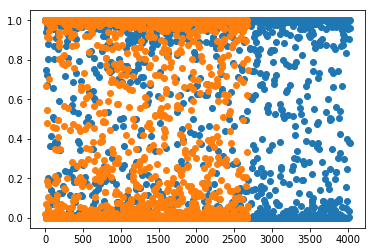

In [115]:
plt.plot(Y_positives, 'o')
plt.plot(Y_negatives, 'o')
plt.show()

/people/maurice/anaconda3-4.3.1/envs/pyannote-video-dev-newGPU/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


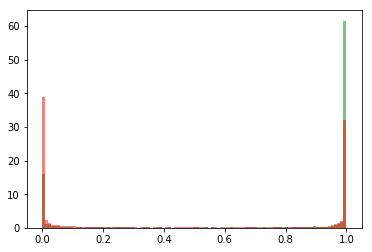

In [116]:
n, bins, patch = plt.hist(Y_positives, bins=np.linspace(0, 1, 100), normed=True, color='g', alpha=0.5)
plt.hist(Y_negatives, bins=bins, normed=True, color='r', alpha=0.5)
plt.show()

In [105]:
print(max(Y_negatives), min(Y_positives))

1.0 8.2390247e-13


In [106]:
fpr, tpr, thresholds, eer = binary_classification.det_curve(np.asarray([0 for i in range(len(Y_negatives))] + [1 for i in range(len(Y_positives))]), np.hstack((Y_negatives,Y_positives)))

In [107]:
eer

0.36551866917111925

In [ ]:
thresholds

In [108]:
from sklearn.metrics import precision_recall_fscore_support
y_true = np.asarray([0 for i in range(len(Y_negatives))] + [1 for i in range(len(Y_positives))])
y_pred = []#np.hstack((Y_negatives,Y_positives))
for y in Y_negatives:
    if y <= 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)
for y in Y_positives:
    if y >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred = np.asarray(y_pred)
precision_recall_fscore_support(y_true, y_pred, average='binary')

(0.7467467467467468, 0.7195563057632023, 0.7328994228171435, None)

In [71]:
y_pred

array([3.9451289e-01, 1.8074647e-02, 6.5393397e-04, ..., 9.9782038e-01,
       9.9998319e-01, 1.0000000e+00], dtype=float32)

In [49]:
r=[1,2,3]
t=[10,9,8]
import itertools
from random import shuffle
g=list(itertools.product(r,t))
print(g)
ids_g=list(range(len(g)))
print(ids_g)
shuffle(ids_g)
print(ids_g)
for id_ in ids_g:
    print(g[id_][0],g[id_][1])

[(1, 10), (1, 9), (1, 8), (2, 10), (2, 9), (2, 8), (3, 10), (3, 9), (3, 8)]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[4, 1, 7, 5, 8, 6, 3, 0, 2]
2 9
1 9
3 9
2 8
3 8
3 10
2 10
1 10
1 8


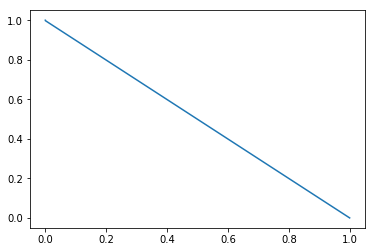

In [30]:
plt.plot(fpr, thresholds)

In [100]:
type_sentence_embedding='infersent'
subset_data = 'big_bang_theory_:'
path_save = '/vol/work3/maurice/HierarchicalRNN/'
sub_path = path_save+type_sentence_embedding+'/'+subset_data
path_work = sub_path+'/work/'

losses = np.load(path_work+'losses.npy')

In [93]:
losses = np.reshape(losses, losses.shape[0]*losses.shape[1])

In [102]:
losses = np.mean(losses, axis=1)

In [103]:
for l in losses:
    print(l)

1.0050203432384515
0.9882464530025362
0.9825340768124541
0.9794302859579991
0.9795278200051595


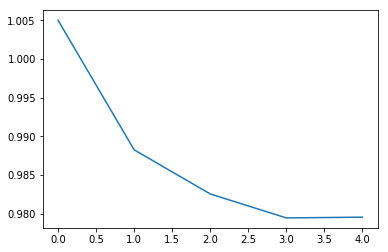

In [104]:
plt.plot(losses)

In [1]:
import data
import model as utils
import pickle
import numpy as np
import torch

In [3]:
device = 'cuda:0'
is_trained = True
type_sentence_embedding='infersent'

X_train, Y_train, X_dev, Y_dev, X_test, Y_test, words_set, we = data.load_data(type_sentence_embedding=type_sentence_embedding)
hidden_size = 300
if type_sentence_embedding == 'lstm':
    taille_embedding = len(we.vectors[we.stoi[X_train[0][0][0]]])
else:
    taille_embedding = 4096

idx_set_words, embed, model_trained, losses = utils.launch_train(X_train, Y_train, words_set, we, taille_embedding, hidden_size=hidden_size, taille_context=3, bidirectional=False, num_layers=1, nb_epoch=300, targset_size=1, device=device, is_trained=is_trained, type_sentence_embedding=type_sentence_embedding)
if is_trained:
    model_trained.load_state_dict(torch.load('/people/maurice/HierarchicalRNN/last_model.pth.tar'))
else:
    np.save('losses.npy', np.asarray(losses))

def get_predictions(X_all, Y_all, idx_set_words, embed, model, taille_context=3, device='cpu', is_eval=False, type_sentence_embedding='lstm'):
    Y_positives_all = []
    Y_negatives_all = []
    file = 0
    for X,Y in zip(X_all,Y_all):
        print('file', file, 'on', len(X_all))
        Y_positives, Y_negatives = utils.get_one_prediction(X, Y, idx_set_words, embed, model, taille_context=taille_context, device=device, is_eval=is_eval,type_sentence_embedding=type_sentence_embedding)
        Y_positives_all += Y_positives
        Y_negatives_all += Y_negatives
        file += 1
        #break
    Y_positives_all = np.asarray(Y_positives_all)
    Y_negatives_all = np.asarray(Y_negatives_all)
    np.save('Y_positives.npy', Y_positives_all)
    np.save('Y_negatives.npy', Y_negatives_all)
    print(np.mean(Y_positives_all), np.mean(Y_negatives_all), np.mean(Y_positives_all) - np.mean(Y_negatives_all))

get_predictions(X_train, Y_train, idx_set_words, embed, model_trained, taille_context=3, device=device, is_eval=True, type_sentence_embedding=type_sentence_embedding)
#get_predictions(X_dev, Y_dev, idx_set_words, embed, model_trained, taille_context=3, device=device, is_eval=True, type_sentence_embedding=type_sentence_embedding)
#get_predictions(X_test, Y_test, idx_set_words, embed, model_trained, taille_context=3, device=device, is_eval=True, type_sentence_embedding=type_sentence_embedding)

file 0 on 176
Found 927(/934) words with w2v vectors
Vocab size : 927


/people/maurice/HierarchicalRNN/model.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  alpha_ = self.softmax(alpha_)


1.0 1.0 0.0
0.9999996423721313 1.0 3.5762786865234375e-07
0.99997878074646 1.0 2.1219253540039062e-05
0.0009240505169145763 0.0 0.0009240505169145763
2.776459098186024e-07 0.0 2.776459098186024e-07
0.999867014395885 0.00041399021734041415 0.9994530241785445


In [37]:
import torch
import numpy as np
a=torch.ones(32)

In [39]:
a.shape

torch.Size([32])

In [49]:
b = np.asarray(a)
for d, i in enumerate(b):
    print(d, i, a[d])
    break

0 1.0 tensor(1.)


In [51]:
4%5 == 0

False

In [52]:
meminfo = dict((i.split()[0].rstrip(':'),int(i.split()[1])) for i in open('/proc/meminfo').readlines())
mem_kib = meminfo['MemTotal']  # e.g. 3921852

In [60]:
mem_kib*1000

131784608000

In [55]:
import sys

def get_size(obj, seen=None):
    """Recursively finds size of objects"""
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    # Important mark as seen *before* entering recursion to gracefully handle
    # self-referential objects
    seen.add(obj_id)
    if isinstance(obj, dict):
        size += sum([get_size(v, seen) for v in obj.values()])
        size += sum([get_size(k, seen) for k in obj.keys()])
    elif hasattr(obj, '__dict__'):
        size += get_size(obj.__dict__, seen)
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum([get_size(i, seen) for i in obj])
    return size

get_size(torch.ones(8,32,4096))

184

In [62]:
(mem_kib*1000)/(2*176*184*500)

4069.435770750988

In [74]:
import glob
type_sentence_embedding='infersent'
subset_data = 'big_bang_theory_:'
path_save = '/vol/work3/maurice/HierarchicalRNN/'
sub_path = path_save+type_sentence_embedding+'/'+subset_data
path_data = sub_path+'/pre_trained_features'
path_data_train=path_data+'/train/'
nb_files = len(list(glob.glob(path_data_train+'inputs_embeddings_*.pickle')))
for it_ in range(nb_files):
    #print(it_+1,'on',nb_files)        
    sentences_embs = torch.load(path_data_train+'inputs_embeddings_'+str(it_)+'.pickle')
    refs = torch.load(path_data_train+'outputs_refs_'+str(it_)+'.pickle')

    if it_ == 142:
        for sentences_emb, ref in zip(sentences_embs, refs): #Each file contains all the tensor of window-size for one episode
            #sentences_emb = sentences_emb.to(device)
            #ref = ref.to(device)
            print(sentences_emb.shape, ref.shape)#[1]

torch.Size([0]) torch.Size([0])
torch.Size([8, 32, 4096]) torch.Size([1, 32])
torch.Size([8, 32, 4096]) torch.Size([1, 32])
torch.Size([8, 32, 4096]) torch.Size([1, 32])
torch.Size([8, 32, 4096]) torch.Size([1, 32])
torch.Size([8, 32, 4096]) torch.Size([1, 32])
torch.Size([8, 32, 4096]) torch.Size([1, 32])
torch.Size([8, 32, 4096]) torch.Size([1, 32])
torch.Size([8, 32, 4096]) torch.Size([1, 32])
torch.Size([8, 32, 4096]) torch.Size([1, 32])
torch.Size([8, 32, 4096]) torch.Size([1, 32])


In [121]:
test_set = ['TheBigBangTheory.Season01.Episode01']
for file in glob.glob('/vol/work2/galmant/transcripts/*'):
    if file.split('/')[-1] in test_set:
        print(file)

/vol/work2/galmant/transcripts/TheBigBangTheory.Season01.Episode01


In [122]:
'TheBigBangTheory.Season01.Episode01' in 'TheBigBangTheory.Season01'

False

In [124]:
'TheBigBangTheory.Season01' in ['TheBigBangTheory.Season01']

True

In [127]:
'.'.join('TheBigBangTheory.Season01.Episode01'.split('.')[:-1])

'TheBigBangTheory.Season01'

In [128]:
import tensorflow as tf
print(tf.__version__)

1.8.0


In [141]:
def foo():
    for a in range(10):
        yield (a,)+(a,)

print(list(foo()))
list(a)

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


NameError: name 'a' is not defined

In [142]:
r = None
print(r)
if not r:
    print('?')
print(r is None)

None
?
True


In [144]:
a = ['398.97083694' '168.88645104' '430.25401822' '209.96663704'   '0.99678814']
print(a[0])

398.97083694168.88645104430.25401822209.966637040.99678814
